# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#API Url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [6]:
city_data = pd.DataFrame(columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
for city  in cities:
    try:
    #city_url = query_url  + "&q=" + city
        response = requests.get(query_url + city).json()
        city_data.loc[city,'City'] = response['name']
        city_data.loc[city,'Cloudiness'] = response['clouds']['all']
        city_data.loc[city,'Country'] = response['sys']['country']
        city_data.loc[city,'Date'] = response['sys']['sunset']
        city_data.loc[city,'Humidity'] = response['main']['humidity']
        city_data.loc[city,'Lat'] = response['coord']['lat']
        city_data.loc[city,'Lng'] = response['coord']['lon']
        city_data.loc[city,'Max Temp'] = response['main']['temp_max']
        city_data.loc[city,'Wind Speed'] = response['wind']['speed']
    except: KeyError
    pass
city_data = city_data.reset_index()
del city_data['index']
city_data.to_csv ('city_data.csv', index = None, header=True)
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,1581565315,79,-23.12,-134.97,78.73,17.69
1,Mount Isa,41,AU,1581585667,22,-20.73,139.5,91.4,11.41
2,Port Lincoln,74,AU,1581587632,73,-34.73,135.87,70.54,8.41
3,New Norfolk,90,AU,1581585775,72,-42.78,147.06,64,3.36
4,Arraial do Cabo,100,BR,1581543008,89,-22.97,-42.03,72.23,8.59


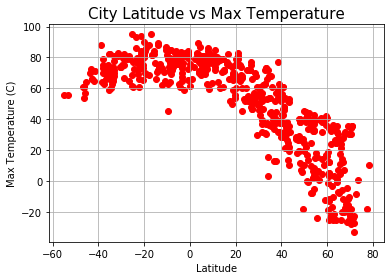

In [5]:
#Plotting Data Lat vs Temp
title = f"City Latitude vs Max Temperature"
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker = "o", color="red")
plt.title(title, size=15)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.savefig(f"{title}.png")

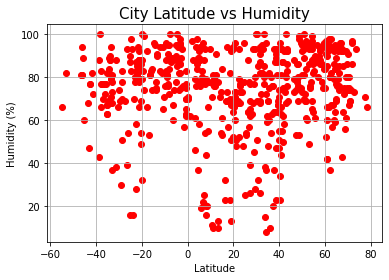

In [6]:
#Plotting Data Lat vs Humidity
title = "City Latitude vs Humidity"
plt.scatter(city_data["Lat"], city_data["Humidity"], marker = "o", color="red")
plt.title(title, size=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig(f"{title}.png")

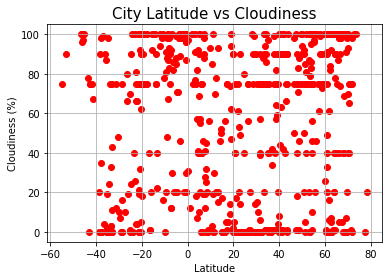

In [7]:
#Plotting Data Lat vs Cloudiness
title = "City Latitude vs Cloudiness"
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker = "o", color="red")
plt.title(title, size=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig(f"{title}.png")

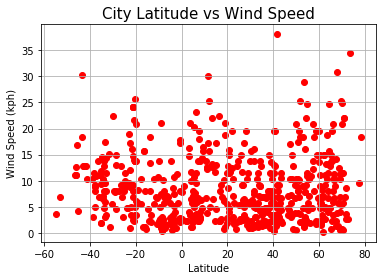

In [8]:
#Plotting Data Lat vs Wind Speed
title = "City Latitude vs Wind Speed"
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker = "o", color="red")
plt.title(title, size=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid(True)
plt.savefig(f"{title}.png")

In [9]:
#North/South Regression
city_data_north = city_data.drop(city_data[city_data["Lat"] <= 0].index)
city_data_south = city_data.drop(city_data[city_data["Lat"] > 0].index)

The r-squared is: -0.8539696541873243


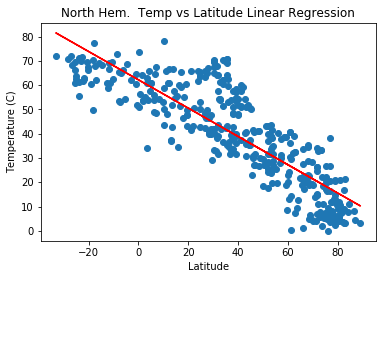

In [10]:
#North Hem. Stats
title = "North Hem.  Temp vs Latitude Linear Regression"
x = city_data_north["Max Temp"]
y = city_data_north["Lat"]
slope, intercept, r_value, p_value, std_err = linregress(x.astype(float), y.astype(float))
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Temperature (C)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {r_value}")
plt.show()

The r-squared is: 0.2589860267040628


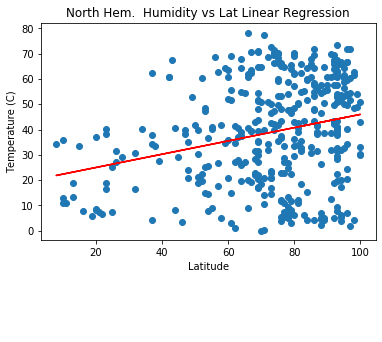

In [11]:
#North Hem. Stats
title = "North Hem.  Humidity vs Lat Linear Regression"
x = city_data_north["Humidity"]
y = city_data_north["Lat"]
slope, intercept, r_value, p_value, std_err = linregress(x.astype(float), y.astype(float))
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Temperature (C)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {r_value}")
plt.show()

The r-squared is: 0.19959529014164265


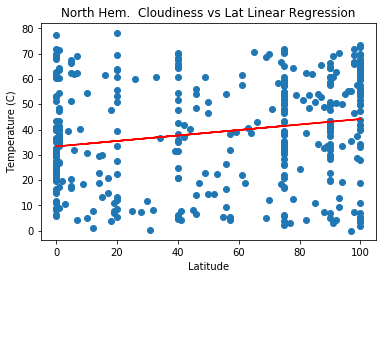

In [12]:
#North Hem. Stats
title = "North Hem.  Cloudiness vs Lat Linear Regression"
x = city_data_north["Cloudiness"]
y = city_data_north["Lat"]
slope, intercept, r_value, p_value, std_err = linregress(x.astype(float), y.astype(float))
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Temperature (C)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {r_value}")
plt.show()

The r-squared is: 0.06952699902863987


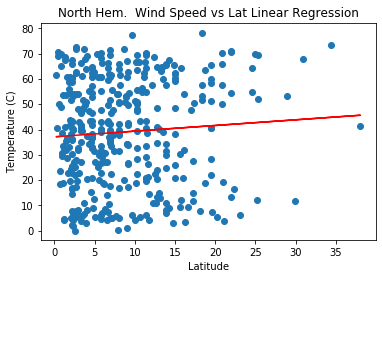

In [13]:
#North Hem. Stats
title = "North Hem.  Wind Speed vs Lat Linear Regression"
x = city_data_north["Wind Speed"]
y = city_data_north["Lat"]
slope, intercept, r_value, p_value, std_err = linregress(x.astype(float), y.astype(float))
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Temperature (C)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {r_value}")
plt.show()

The r-squared is: 0.3435846017205187


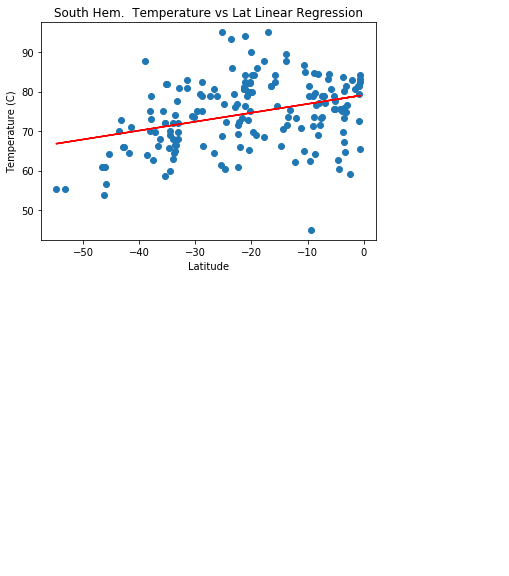

In [14]:
#South Hem. Stats
title = "South Hem.  Temperature vs Lat Linear Regression"
x = city_data_south["Lat"]
y = city_data_south["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x.astype(float), y.astype(float))
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Temperature (C)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {r_value}")
plt.show()

The r-squared is: 0.21073800346430469


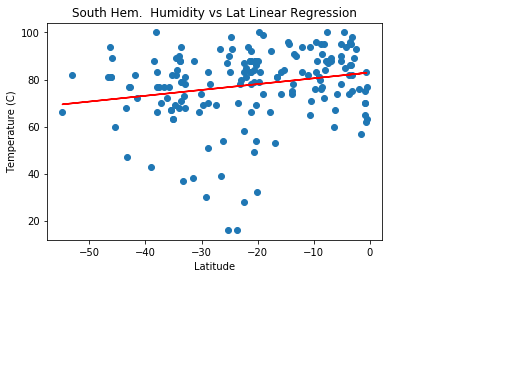

In [15]:
#South Hem. Stats
title = "South Hem.  Humidity vs Lat Linear Regression"
x = city_data_south["Lat"]
y = city_data_south["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x.astype(float), y.astype(float))
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Temperature (C)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {r_value}")
plt.show()

The r-squared is: 0.26911215165157015


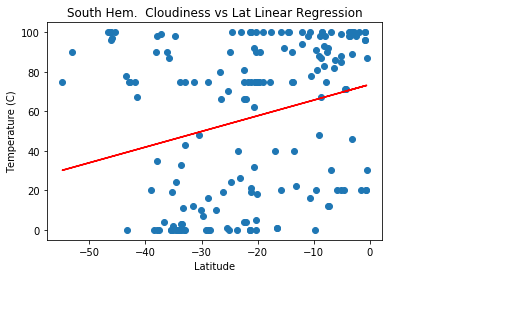

In [16]:
#South Hem. Stats
title = "South Hem.  Cloudiness vs Lat Linear Regression"
x = city_data_south["Lat"]
y = city_data_south["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x.astype(float), y.astype(float))
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Temperature (C)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {r_value}")
plt.show()

The r-squared is: -0.3047520915324984


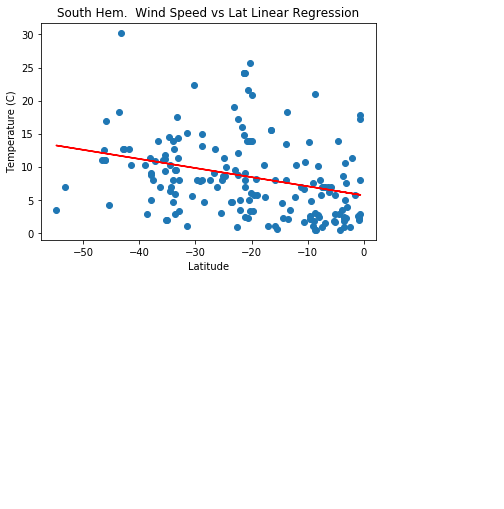

In [17]:
#South Hem. Stats
title = "South Hem.  Wind Speed vs Lat Linear Regression"
x = city_data_south["Lat"]
y = city_data_south["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x.astype(float), y.astype(float))
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Temperature (C)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {r_value}")
plt.show()